<div style="color:white;background-color:black;border:5px solid powderblue;border-radius:25px;text-align:center;font-family:Copperplate">
    <h1>DATA DECISION PATHS</h1><hr style="border:2px solid powderblue">
    <div style="color:white;background-color:black;border-radius:25px;text-align:right;">
        <br>
        <h2 style="color:red;display:inline;">NAME:</h2><h2 style="display:inline;">MOHAMADH IRFAN</h2><br>
        <h2 style="color:red;display:inline;">BATCH:</h2><h2 style="display:inline;padding-right:62px;">AI-ELITE-7</h2>
    </div>
    <div style="color:white;background-color:black;border-radius:25px;text-align:Left;font-family:Courier New;margin-left:4%;">
        <h3 style="color:white;font-weight:bold;font-family:Papyrus">Data Description:</h3>
        <p style="padding-left:8%;padding-right:8%;">
        - The dataset consists of three columns and 2000 rows which includes two feature columns and one label column.<br>
        - Features columns are in the form of float and continuous values ranges from <strong>[-9.462311 to 9.659887]</strong> and <strong>[-11.017154 to 11.227412]</strong> and the means are at <strong>[0.035789 and 0.170252]</strong>.<br>
         - Whereas label is in the form discreate numerical integer values that inclueds <strong>[0 and 1]</strong>. 50% of the data consists of 0 and rest consists of 1 as labels.<br>
            - There are zero duplicates and no null values consists in the dataset.<br>
            <strong>-</strong> Pattern that is formed by the input features is <strong>two spirals shape</strong>. That means one sprial consists of labels as 0 and the other consists of 1.
            <img src=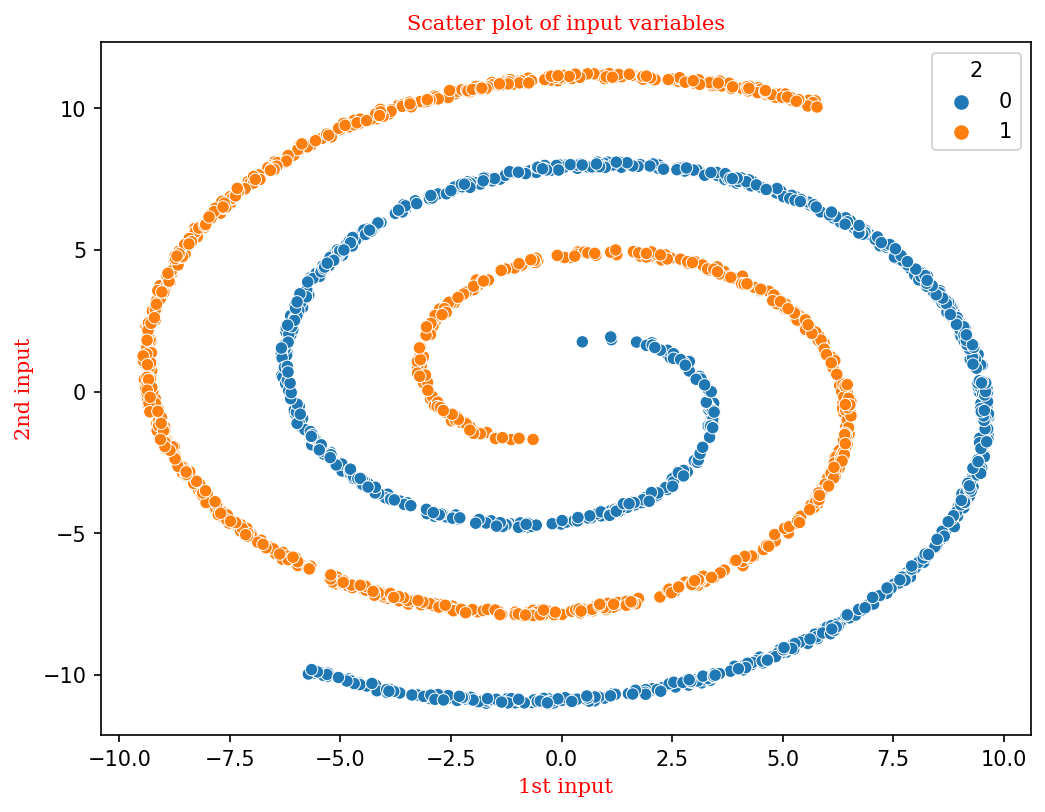>
        </p>
    </div>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv("8.twospirals.csv",header=None)

In [143]:
df.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [145]:
df.duplicated().sum()

0

In [146]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [147]:
num=df.select_dtypes(include='number')

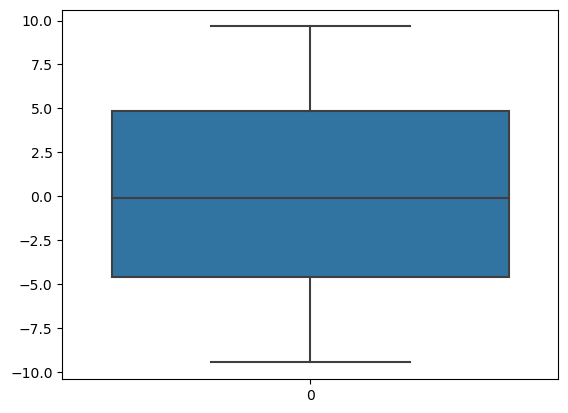

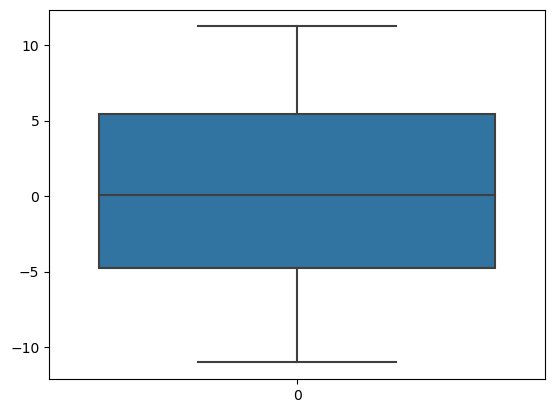

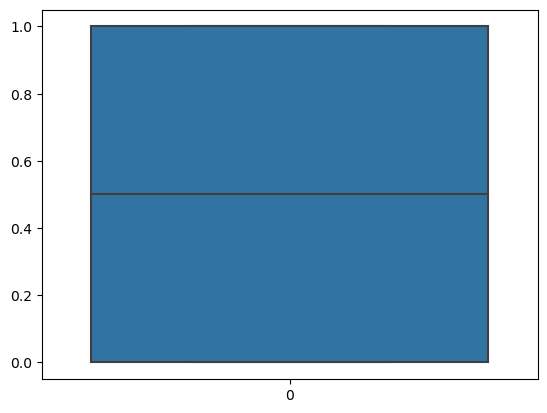

In [148]:
for i in num:
    sns.boxplot(num[i])
    plt.show()

In [149]:
df.describe()

,0,1,2
count,2000.000000,2000.000000,2000.000000
mean,0.035789,0.170252,0.500000
std,5.580847,6.480102,0.500125
min,-9.462311,-11.017154,0.000000
25%,-4.589943,-4.790316,0.000000
50%,-0.126161,0.039630,0.500000
75%,4.835311,5.460470,1.000000
max,9.659887,11.227412,1.000000


In [150]:
df[2].value_counts()

0    1000
1    1000
Name: 2, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[[0,1]],df[2],test_size=0.2,random_state=42)

In [152]:
X_train.shape, X_test.shape

((1600, 2), (400, 2))

In [153]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_trains = scale.fit_transform(X_train)
X_tests = scale.transform(X_test)

In [154]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [383]:
model = Sequential()
model.add(Dense(12,activation="relu",kernel_initializer="he_normal",input_dim=2))

model.add(Dense(10,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(9,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(8,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(6,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(5,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(4,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [384]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_194 (Dense)           (None, 12)                36        
                                                                 
 dense_195 (Dense)           (None, 10)                130       
                                                                 
 dense_196 (Dense)           (None, 9)                 99        
                                                                 
 dense_197 (Dense)           (None, 8)                 80        
                                                                 
 dense_198 (Dense)           (None, 7)                 63        
                                                                 
 dense_199 (Dense)           (None, 6)                 48        
                                                                 
 dense_200 (Dense)           (None, 5)               

In [385]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [386]:
history = model.fit(X_trains,y_train,epochs=50,batch_size=12,validation_split=0.2)

Epoch 1/50
107/107 [==============================] - 3s 5ms/step - loss: 0.6845 - accuracy: 0.5227 - val_loss: 0.6839 - val_accuracy: 0.4563
Epoch 2/50
107/107 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5508 - val_loss: 0.6752 - val_accuracy: 0.6250
Epoch 3/50
107/107 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.5719 - val_loss: 0.6718 - val_accuracy: 0.6281
Epoch 4/50
107/107 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.5711 - val_loss: 0.6696 - val_accuracy: 0.6406
Epoch 5/50
107/107 [==============================] - 0s 4ms/step - loss: 0.6617 - accuracy: 0.6008 - val_loss: 0.6658 - val_accuracy: 0.6313
Epoch 6/50
107/107 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.5836 - val_loss: 0.6646 - val_accuracy: 0.6438
Epoch 7/50
107/107 [==============================] - 0s 4ms/step - loss: 0.6698 - accuracy: 0.5773 - val_loss: 0.6615 - val_accuracy: 0.6469
Epoch 

In [387]:
model.get_weights()

[array([[ 0.37524956,  0.46212956, -1.9258343 , -0.97609776,  0.22323984,
          1.1344668 , -1.0012274 ,  0.37727258, -0.827646  , -0.5713218 ,
         -2.03855   ,  0.8552939 ],
        [-0.4715038 ,  0.9587735 , -2.327345  , -0.83145136,  1.0197523 ,
         -0.5324942 ,  0.753058  , -0.49324045,  2.1386707 , -0.24095726,
         -0.7437185 ,  1.7666572 ]], dtype=float32),
 array([-0.2471036 ,  0.09748454, -0.2256526 ,  0.16269834,  0.02685434,
        -0.04234074,  0.3274015 ,  0.02026429, -0.21990822, -0.18292303,
         0.11538155, -0.26905605], dtype=float32),
 array([[-3.11583728e-02,  1.89897344e-01,  1.60616415e-03,
         -4.91755784e-01,  3.90366197e-01,  2.26447895e-01,
          4.01360810e-01,  6.61122859e-01,  2.71994978e-01,
         -4.64833468e-01],
        [-3.64570856e-01,  6.17609084e-01, -5.97086310e-01,
          1.83070600e-01,  2.34286003e-02,  4.78609979e-01,
         -2.83329189e-01, -8.33193436e-02, -3.65222752e-01,
         -5.86891651e-01],
    

In [388]:
y_cap=model.predict(X_tests)

13/13 [==============================] - 0s 1ms/step


In [389]:
y_capf=np.where(y_cap>0.5,1,0)

In [390]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.995

In [391]:
data = np.array([history.history["loss"],history.history["val_loss"]])
# data = data.reshape(50,2)
[[data[:,0].max(),data[:,1].max()]]

[[0.684496283531189, 0.6754254102706909]]

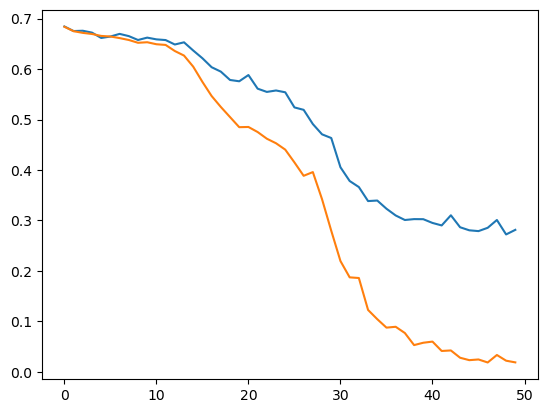

In [392]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

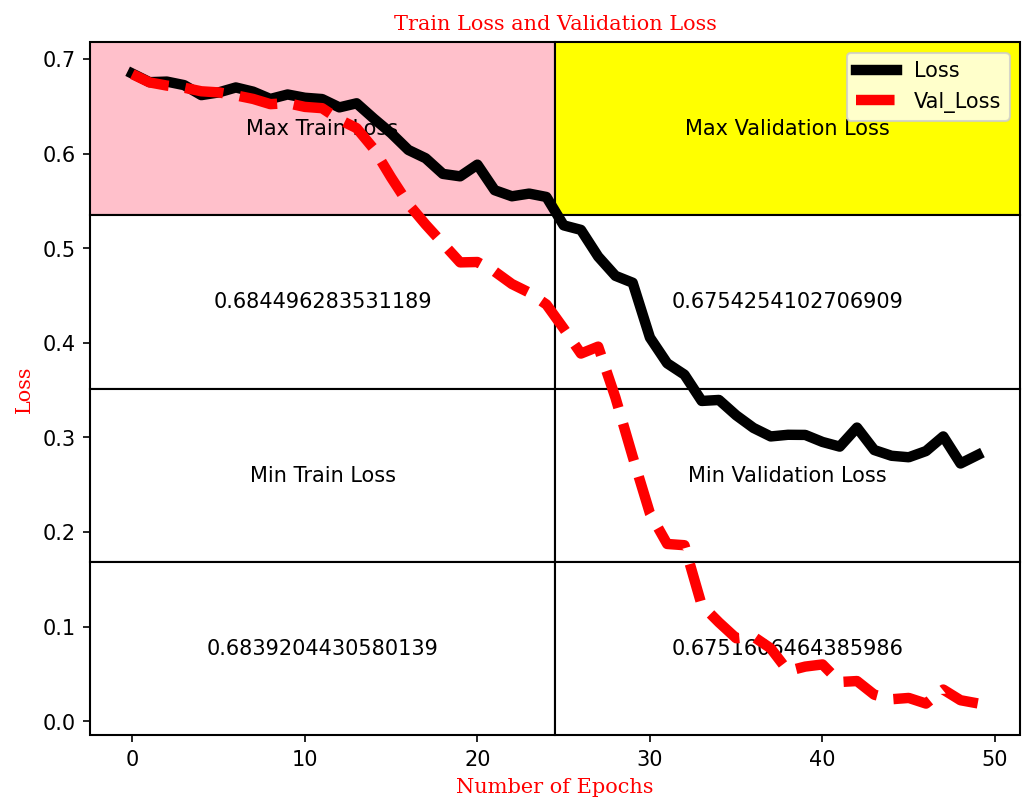

In [393]:
plt.figure(figsize=(8,6),dpi=150)
plt.plot(history.history["loss"],'black',linewidth=5)
plt.plot(history.history["val_loss"],'r--',linewidth=5)
plt.table(cellText=[[data[:,0].max(),data[:,1].max()],["Min Train Loss","Min Validation Loss"],[data[:,0].min(),data[:,1].min()]],cellLoc='center',colWidths=[0.4,0.4,0.4],
         colLabels=['Max Train Loss','Max Validation Loss'],colColours=['pink','yellow'],bbox=[0,0,1,1])
plt.legend(["Loss","Val_Loss"])
plt.title("Train Loss and Validation Loss",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("Number of Epochs",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("Loss",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [394]:
from mlxtend.plotting import plot_decision_regions as pt

15000/15000 [==============================] - 27s 2ms/step


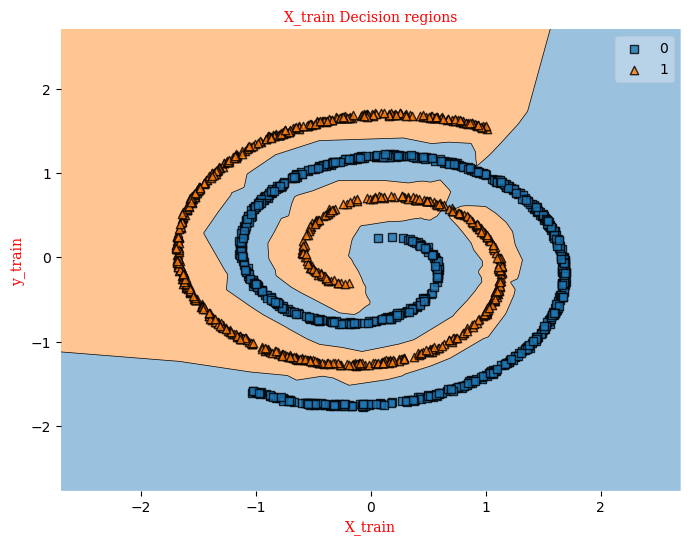

In [395]:
plt.figure(figsize=(8,6))
pt(X_trains,y_train.values.astype(int),clf=model)
plt.title("X_train Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_train",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_train",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [396]:
y_pred = model.predict(X_tests)

13/13 [==============================] - 0s 2ms/step


In [397]:
y_predf = np.array([1 if x>0.5 else 0 for x in y_pred])

15000/15000 [==============================] - 27s 2ms/step


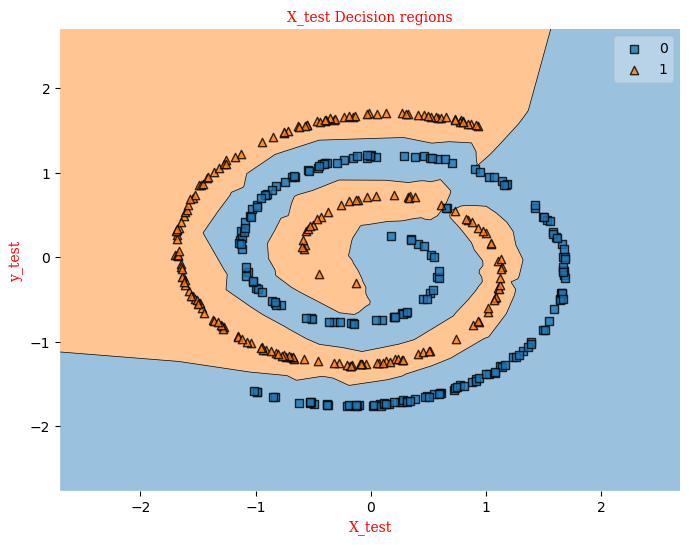

In [398]:
plt.figure(figsize=(8,6))
pt(X_tests,y_predf.astype(int),clf=model)
plt.title("X_test Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_test",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_test",color='red',fontsize='medium',fontfamily='serif')
plt.show()